<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Hi Mazin! Please check the errors at the end of your notebook, fix those so I can fully review your project in the next submission ;) It's a requeriment for me to be able to run correctly every cell in the notebook.

<div style="border:solid blue 2px; padding: 20px">
<b> Reviewer Rules</b>

Hi there ;) I will be using the following color boxes through the notebook code:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Green means that it was nicely done.
    
</div>    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what could be optimized. This is not necessary, but it will be great if you make changes to this project.
 
</div>      
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Red is for things that must be done or changed for me to approve the project. If I rejected the project, you must look for this comments.
    
</div>    
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Dear Mazin,

Thank you for sharing your project on predicting customer churn for Beta Bank! You’ve built a pipeline that includes data preparation, exploratory analysis, and multiple model experiments (Decision Tree, Logistic Regression, and Random Forest). Below, I’ll highlight key strengths, offer suggestions for further improvement, and note whether any critical changes are needed.

---

**✅ Strengths**

1. **Data Preprocessing and Encoding:**
   - You identified irrelevant columns (`RowNumber`, `CustomerId`, `Surname`) and dropped them so they wouldn’t distract the model.
   - You handled missing values in the **Tenure** column by filling in the median, ensuring that important rows weren’t lost.
   - For categorical features like **Gender** and **Geography**, you utilized One-Hot Encoding to effectively convert them into numeric form.

2. **Class Imbalance Awareness:**
   - You recognized that only ~20% of customers exited, creating a notable imbalance.
   - This imbalance was addressed via methods like specifying `class_weight='balanced'` and upsampling.

3. **Model Variety and Comparison:**
   - You evaluated multiple classifiers (Decision Tree, Logistic Regression, Random Forest) and used F1-score and AUC-ROC metrics to track performance.
   - Your final Random Forest approach achieved an F1 score near **0.80**, which is substantially above the 0.59 target, indicating a strong balance between precision and recall.
   - The AUC-ROC result of **0.85** confirms the model effectively distinguishes between customers who stay and those who leave.

4. **Conclusive Summary and Business Value:**
   - Your conclusion ties back to Beta Bank’s core issue: proactively identifying at-risk customers.
   - By noting that your final model can capture around 85% of churn-related signals, you demonstrate clear value: Beta Bank can prioritize retention efforts on flagged customers.

---

**⚠️ Suggestions for Further Improvement**

1. **Hyperparameter Tuning:**  
   - Although you manually tested different max depths and estimators, consider a systematic parameter search (e.g., `GridSearchCV` or `RandomizedSearchCV`) to find the absolute best hyperparameters for Random Forest (or other advanced models like Gradient Boosting or XGBoost).

2. **Threshold Adjustment:**  
   - Fine-tuning the decision threshold with probability outputs may further improve recall or precision, depending on Beta Bank’s retention strategy (whether false positives or false negatives are costlier).

3. **Deeper Feature Analysis:**  
   - Expand your feature exploration. For instance, how do `CreditScore` or `Balance` differ in churn vs. non-churn groups? Identifying such differences might inspire additional feature engineering.

4. **Cross-Validation Strategies:**  
   - To ensure your model generalizes well, consider using cross-validation on the training set. This can provide more robust performance estimates before final testing.

---

**⛔️ Critical Changes Required**

**Look for the red boxes through the notebook ;)**

---

**Status**: waiting for changes

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 2**

Great job on this 2nd submission!! You just a minor thing, you forgot to sanity check the shape of the test set after splitting the data. Please check that and we'll be okay for approval ;)


<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 3**

Approved :)

# Predicting Customer Churn Through Machine Learning

Beta Bank, like  other organisations, struggles with customer attrition and keeping customers loyal in the long-term. They have become increasingly aware of the increased cost of customer acquisition vs. retaining existing customers, and are seeking to predict customers most at risk of banking elsewhere to address this. 

We are using historicdal customer data to predict defections based on behavior that most closely resembles that of lost customers. We will build a model with the maximum possible F1 score, with Beta Bank setting a minimum F1 score threshold of 0.59. Additionally, we will measure the AUC-ROC metric and compare it with the F1.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Good introduction
</div>

### Data Import & Cleaning

In [1]:
#importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
#uploading the CSV dataset
data = pd.read_csv("/datasets/Churn.csv")

In [3]:
#checking data for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


There are 10k non-null entries for every column except 'Tenure'. This column is missing 909 entries, equalling ~9% missing this data. The project description defines Tenure as the period of maturation for a customer’s fixed deposit in years. Our Regression models cannot handle columns with missing values. Given that this is an important variable that can affect customer behavior, we will fill out this column's missing values. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Correct
</div>

In [4]:
#previewing the data
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


At first glance, the exiting customers appear to have higher estimated salaries, and worryingly for Beta Bank, represent some of the more tenured customers. We will train several models to explore the relationship of the variables further through regression analysis. 

We will feature scale the data before it is trained, and standardize the features so the models assign them equal weight when formulating predictions. Before we do so, we need to take out the first 3 features: customer ID, surname, and credit score, as they have no bearing on customer likelihood to exit and will confuse the model. 

In [5]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [6]:
#checking for duplicates
display(data.duplicated().sum())

0

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Good job
</div>

0    7963
1    2037
Name: Exited, dtype: int64


<AxesSubplot:>

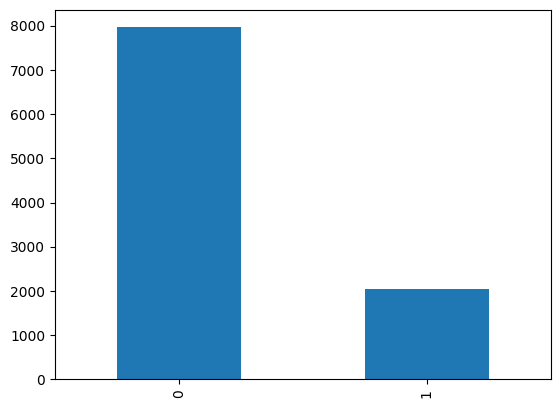

In [7]:
class_frequency = data['Exited'].value_counts(normalize=False)
print(class_frequency)
class_frequency.plot(kind='bar')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

It's good that you added a graph 
</div>

In [8]:
#counting the class imbalance. Proportion of customers who have exited
data[data['Exited'] == 1].count()

CreditScore        2037
Geography          2037
Gender             2037
Age                2037
Tenure             1854
Balance            2037
NumOfProducts      2037
HasCrCard          2037
IsActiveMember     2037
EstimatedSalary    2037
Exited             2037
dtype: int64

2,037 customers have exited out of 10,000 customers, equalling 20% of our customers. 9% of customers are missing Tenure data, and this lack of data affects both positive and negative classes equally. We will populate the missing Tenure values with median values to avoid errors in our regression analysis.

In [9]:
#replacing missing Tenure values with median
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)

Tenure no longer has missing values. To perform our regression analysis without errors, we need to use One Hot Encoding (OHE) to turn the categorical values in the dataframe to numerical ones. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Correct
</div>

In [10]:
#transforming the features using Label Encoding
#encoder = OrdinalEncoder()
#encoder.fit(data)
#data_ordinal = encoder.transform(data)
#data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)

In [39]:
#converting the categorical features using One Hot Encoding 
data_ohe = pd.get_dummies(data, drop_first=True)

#splitting our data, features, and target
target = data_ohe['Exited']                          
features = data_ohe.drop('Exited', axis=1)

#splitting the data into training & validation test sets (80/20 split)
features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

#split the training+validation set into separate training and validation sets (75/25 split of the 80%)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, test_size=0.25, random_state=12345)

display(features_train.shape)
display(features_test.shape)
display(features_valid.shape)

(6000, 11)

(2000, 11)

(2000, 11)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

The dataset was split into only two sets (training and test). For robust model evaluation, it’s essential to have a dedicated validation set in addition to a training and test set. A three-way split allows you to tune hyperparameters and compare model performance without overfitting to the test data.

To fix this, please split your data into three sets. For example, you can use the following code:

<pre><code>
# First, split the data into training+validation and test sets (80/20 split)
features_train_valid, features_test, target_train_valid, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Then split the training+validation set into separate training and validation sets (75/25 split of the 80%)
features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, target_train_valid, test_size=0.25, random_state=42)

print("Training set shape:", features_train.shape)
print("Validation set shape:", features_valid.shape)
print("Test set shape:", features_test.shape)
</code></pre>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

Great job, you just forgot to check the test dataset shape. We must be sure it's ok ;)
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 3</b>

Thanks!
</div>

Feature Scaling will lead to a more accurate predictive model as the features will be given equal weight.  

In [12]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
print(features_train.head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
9022     0.627270 -1.498089 -1.086981 -1.214015       0.800940  -1.530561   
3779    -0.283865 -0.179708 -1.812482 -1.214015       0.800940  -1.530561   
3974     1.134606 -1.121409  1.089521 -1.214015       0.800940   0.653355   
9206    -0.283865  1.232843 -1.812482  0.926066      -0.917815  -1.530561   
1755    -1.226061  1.232843  0.726770 -1.214015      -0.917815  -1.530561   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
9022        0.972381        -0.591058                  0                0   
3779       -1.028403         0.195087                  0                0   
3974       -1.028403        -0.651753                  0                1   
9206       -1.028403        -1.665704                  1                0   
1755        0.972381         1.618021                  0                1   

      Gender_Male  
9022            1  
3779            1  
3974          

/tmp/ipykernel_144/556681698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_144/556681698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Code is correct, but you must also add the features_test and scale them

#### Decision Tree Modeling

In [13]:
#training the model
model = DecisionTreeClassifier(random_state=12345)    #creating a model
model.fit(features_train, target_train)               #training 
predicted_valid = model.predict(features_valid)       #predicting a validation set
display("The model has been trained")

'The model has been trained'

In [14]:
#calculating the F1 score
display('F1 Score is', f1_score(target_valid, predicted_valid))
display('AUC-ROC is', roc_auc_score(target_valid, predicted_valid))

'F1 Score is'

0.49940828402366866

'AUC-ROC is'

0.6890834760167747

The Decision Tree model only gives us an F1 score of 0.49, below the 0.59 required by the bank. We will look at other models as well.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Correct

#### Logistic Regression

In [15]:
#training the model
model = LogisticRegression(solver='liblinear', random_state=12345) #creating the model
model.fit(features_train, target_train)                            #fitting & training
predicted_valid = model.predict(features_valid)                    #predicting a validation set

display('F1 Score is', f1_score(target_valid, predicted_valid))
display('AUC-ROC is', roc_auc_score(target_valid, predicted_valid))

'F1 Score is'

0.3470483005366726

'AUC-ROC is'

0.6018790788853322

Logistic Regression gives us a very low F1-score of 0.29 and does not appear to do well in either precision or recall. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Correct

#### Balancing the classes

We are only interested in the behavior of the 20% of the customers who have exited, as they will help us predict future cancelations. We will let our models know to more heavily weight the rarer class i.e. the 20% of lost clients. 

In [16]:
#training the model with balanced classes
model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)                #training on training set
predicted_valid = model.predict(features_valid)        #predic
display('F1 Score is', f1_score(target_valid, predicted_valid))
display('AUC-ROC is', roc_auc_score(target_valid, predicted_valid))

'F1 Score is'

0.4864406779661017

'AUC-ROC is'

0.7020025310801756

This is our best score yet. Our F1 is above 0.5, and our AUC-ROC is above 7. These are still not up to Beta Bank's standards, but are getting closer. 

In [17]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')    #creating a model
model.fit(features_train, target_train)                                        #training 
predicted_valid = model.predict(features_valid)
display('F1 Score is', f1_score(target_valid, predicted_valid))
display('AUC-ROC is', roc_auc_score(target_valid, predicted_valid))

'F1 Score is'

0.49130938586326767

'AUC-ROC is'

0.6849952852428101

This is a much better F1-score than we got using Decision Trees prior to balancing classes but still short of what we are looking for, and less accurate than above with Decision Trees. 

##### Predicting class probability. 

In [18]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid) 
display(probabilities_valid[:8]) 

array([[0.79982941, 0.20017059],
       [0.40321632, 0.59678368],
       [0.85460981, 0.14539019],
       [0.83986191, 0.16013809],
       [0.94578971, 0.05421029],
       [0.90314918, 0.09685082],
       [0.80250681, 0.19749319],
       [0.72889474, 0.27110526]])

The first and fourth rows have the highest values for the positive classes. Although all the features play some role in helping predict customer exits, Credit Scores and Account Balances appear to be the most relevant variables in predicting exits.  

##### Upsampling our Data

We will duplicate the positive class observations (exited customers) and combine them with the negative class observations to make observation of the rarer class less rare. This will increase instances of the positive class, customers who have left and provide more instances to our model to train with. 

In [19]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    arg1 = pd.concat([features_zeros] + [features_ones] * repeat)
    arg2 = pd.concat([target_zeros] + [target_ones] * repeat)

    upsampled_features, upsampled_target = shuffle(
        arg1, arg2, random_state=12345)

    return upsampled_features, upsampled_target, arg1, arg2

upsampled_features, upsampled_target, arg_1, arg_2 = upsample(
    features_train, target_train, 3)

In [38]:
model = LogisticRegression(random_state=12345, solver = 'liblinear')
model.fit(upsampled_features, upsampled_target) 
predicted_valid = model.predict(features_valid) # < write code here >

display('F1:', f1_score(target_valid, predicted_valid))

'F1:'

0.49170731707317067

This score is less than the 0.50 we got before upsampling, meaning our logistic regression was more accurate without it. 

#####  Decision Tree

In [21]:
#training the model
model = DecisionTreeClassifier(random_state=12345)    #creating a model
model.fit(upsampled_features, upsampled_target)             #training 
predicted_valid = model.predict(features_valid)       #predicting a validation set
display("The model has been trained")
display('F1:', f1_score(target_valid, predicted_valid))
display('AUC-ROC is', roc_auc_score(target_valid, predicted_valid))

'The model has been trained'

'F1:'

0.49940828402366866

'AUC-ROC is'

0.6890834760167747

In [22]:
for depth in range(1, 27):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    display('max_depth =', depth)
    display('F1 score is', f1_score(target_valid, predictions_valid))

'max_depth ='

1

'F1 score is'

0.0

'max_depth ='

2

'F1 score is'

0.48640483383685806

'max_depth ='

3

'F1 score is'

0.5103857566765578

'max_depth ='

4

'F1 score is'

0.48852459016393446

'max_depth ='

5

'F1 score is'

0.5120772946859903

'max_depth ='

6

'F1 score is'

0.528

'max_depth ='

7

'F1 score is'

0.5567010309278351

'max_depth ='

8

'F1 score is'

0.5423728813559322

'max_depth ='

9

'F1 score is'

0.5488505747126436

'max_depth ='

10

'F1 score is'

0.5238709677419355

'max_depth ='

11

'F1 score is'

0.5169712793733682

'max_depth ='

12

'F1 score is'

0.521072796934866

'max_depth ='

13

'F1 score is'

0.5092707045735476

'max_depth ='

14

'F1 score is'

0.501240694789082

'max_depth ='

15

'F1 score is'

0.5030084235860409

'max_depth ='

16

'F1 score is'

0.4898446833930705

'max_depth ='

17

'F1 score is'

0.49702734839476814

'max_depth ='

18

'F1 score is'

0.4882075471698113

'max_depth ='

19

'F1 score is'

0.4834123222748815

'max_depth ='

20

'F1 score is'

0.49110320284697506

'max_depth ='

21

'F1 score is'

0.4912689173457509

'max_depth ='

22

'F1 score is'

0.491725768321513

'max_depth ='

23

'F1 score is'

0.4935064935064935

'max_depth ='

24

'F1 score is'

0.4958677685950413

'max_depth ='

25

'F1 score is'

0.49940828402366866

'max_depth ='

26

'F1 score is'

0.49940828402366866

We see that a max_depth of 7 offers the highest accuracy score of 0.55, and is not far away from our target of 0.59. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

We must use F1 score, not accuracy. Accuracy is a really bad metric to use when dealing with an imbalanced target problem ;)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

Well done!
</div>

#### Random Forest 

In [23]:
target_train.value_counts()

0    4760
1    1240
Name: Exited, dtype: int64

In [36]:
best_score = 0
best_est = 0
best_depth = 0
estimators = [30, 50, 70, 80, 90, 95, 97, 100, 105, 107, 110]
depths = [15, 25, 27, 29, 30, 33, 34, 35, 40, 45, 55, 65, 75, 85, 95]
for est in estimators: 
    for depth in depths:                                                       # choose hyperparameter range
        RFmodel = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est) # set number of trees
        RFmodel.fit(upsampled_features,upsampled_target)                               # fitting(training) model on training set
        predictions_valid = RFmodel.predict(features_valid)                    #predicting using validation set
        f1=f1_score(target_valid, predictions_valid)
        #f1_scores.append(f1)

        #score = RFmodel.score(features_valid, target_valid)                    # calculate accuracy score on validation set
        if f1 > best_score:
            best_score = f1                                               # save best accuracy score on validation set
            best_est = est                                                   # save number of estimators corresponding to best accuracy score
            best_depth = depth


probabilities_valid = RFmodel.predict_proba(features_valid)                #predicting probability distribution
probabilities_valid_1 = probabilities_valid[:,1]                         #selecting the positive class that we are interested in, exiting customers
auc_roc_score = roc_auc_score(target_valid, probabilities_valid_1)       #

display(f'The best F1 Score =', best_score)
display('Best n_estimators =', best_est)
print(f'Best AUC_ROC score =', auc_roc_score)
print('Best Depth =', best_depth)

display("Model with the highest F1 score on the validation set (n_estimators = {}): {}".format(best_est, best_score)) 
#print(f1_scores)

'The best F1 Score ='

0.609375

'Best n_estimators ='

97

Best AUC_ROC score = 0.8414655140326063
Best Depth = 29


'Model with the highest F1 score on the validation set (n_estimators = 97): 0.609375'

The Random Forest model with 97 estimators and a depth of 29 gives us our highest F1 score of 0.60, and an AUC-ROC of 0.4. This is just above the bank's 0.59 F1 threshold and we will train the model again and predict using the test dataset to see how the F1 score changes.

Previously, we upsampled the data 10x rather than 3x, and this resulted in sub-0.59 F1 scores. Repeating the upsampling 3 times results in a passing F1 score. 

In [26]:
display(data_ohe)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


In [33]:
#concatenating the feature & target datasets 
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])

In [34]:
#upsampling the data for our winning model
full_features_upsampled, full_target_upsampled, arg_1, arg_2 = upsample(
    features_full_train, target_full_train, 3)   #repeating 3x

In [37]:
#training our best scoring Random Forest model on the training set
RFmodel = RandomForestClassifier(random_state=12345, max_depth=29, n_estimators=97)

RFmodel.fit(full_features_upsampled, full_target_upsampled)
predictions = RFmodel.predict(features_test)
display('F1 Score is', f1_score(target_test, predictions))
display('AUC-ROC is', roc_auc_score(target_test, predictions))


'F1 Score is'

0.6077348066298343

'AUC-ROC is'

0.7453618155936733

Success! Our Random Forest model predictions achieved a passing F1 score using our test data set. This is just over the 0.59 that the bank demanded. An F1 of 0.59 is okay, but can stand to be improved upon further. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

You are saying "Acurracy of the best model" but is actually F1 score isnt it?

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

After you get the best model, and the best parameters to use. We must train the model again, but then, predict using the TEST dataset, which wasn't use before this. Those scores using the test dataset will give us our final scores to see if we did good or not ;)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

Great job, thanks for the changes!
</div>

# Conclusion

After much trial and error, we have found a model that is to Beta Bank's standards. We cleaned our data, filled in missing Tenure values, balanced the classes, and scaled our data. Using a Random Forest with 97 estimators and a max_depth of 29 yields an F1 score of 0.6, and an AUC-ROC score of 0.74. An AUC-ROC of 1 means that the model is perfectly able to distinguish between our two target classes, so 0.74 is decent but not perfect.

The bank should use this model for its attrition initiative, as our Random Forest can predict roughly 3/4 of customers likely to exit, which will help pinpoint the bank's retention efforts. The bank should understand that it will be able to identify most, but not all, customers who are likely to exit using this model and that it is by no means a perfect predictor.  

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Good conclusion, let's see how this changes when we add the test set and do the minor changes ;)

In [29]:
#final_model = RandomForestClassifier(random_state=54321, n_estimators=5) 
#final_model.fit(features_train, target_train)
#probabilities_valid = final_model.predict_proba(features_valid)
#probabilities_one_valid = probabilities_valid[:, 1]
#auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

#display('F1 Score is', f1_score(target_valid, predicted_valid))
#display('AUC-ROC is', roc_auc_score(target_valid, predicted_valid))

In [30]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

#rfc = RandomForestRegressor()
#params = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

#grid_model = GridSearchCV(rfc, params,verbose=2)
#grid_model.fit(features_train,target_train)

#pred = grid_model.predict(features_train)

#print('Random Forest accuracy is --> ',r2_score(y_test,pred)*100)

In [31]:
# Define our hyperparams; start wide then narrow
#rfp_grid = {
    # 'max_depth': [x for x in range(8, 11)],
    # 'min_samples_split': [x for x in range(2,6)],
    # 'min_samples_leaf': [2, 3, 4],
    # 'criterion': ['gini', 'entropy'],
    # 'n_estimators': [x for x in range(50, 160, 10)],
    # 'n_jobs': [-1]}

#rf_down1_result, best_model_dict['Random Forest Down 1'], best_model_data_dict['Random Forest Down 1'] = best_model_search(
 #   Xt_train_down1, Yt_train_down1, Xt_val, Yt_val,
  #  estimator = RandomForestClassifier,
   # param_grid = rfp_grid)
